In [6]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from sklearn import svm

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

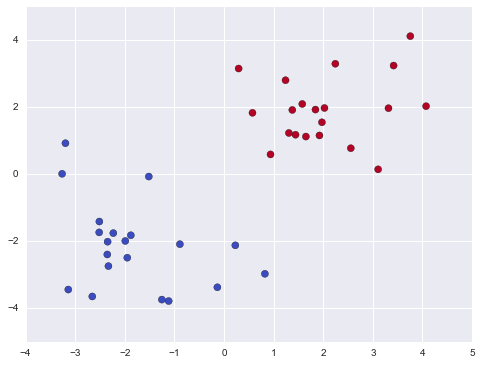

In [9]:
#Data
#data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In [41]:
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=1.

clf = svm.SVC(kernel='linear',C=10000) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X, Y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__1__

__(a)__

In [42]:
# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

print "hyperplane = %s * x + %s" % (a, clf.intercept_[0]/w[1])

hyperplane = -1.17689316087 * x + 0.0766504186458


__(b)__

In [51]:
print "margin=",np.abs(clf.decision_function(clf.support_vectors_)).mean()


margin= 1.00015621207
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


__(c)__

In [52]:
print "support Vectors"
print clf.support_vectors_

support Vectors
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


__(2)__

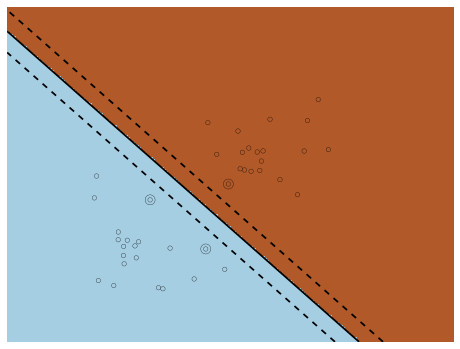

In [54]:
# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
#print "we successfully predict the {} percent of data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y))

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


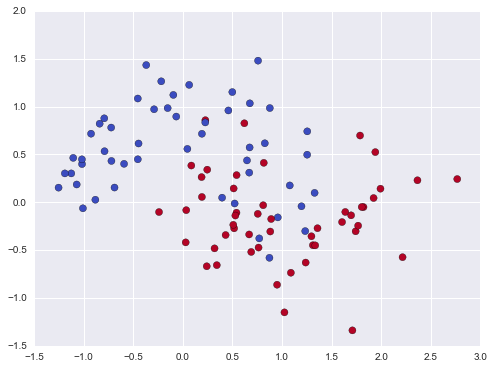

In [3]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


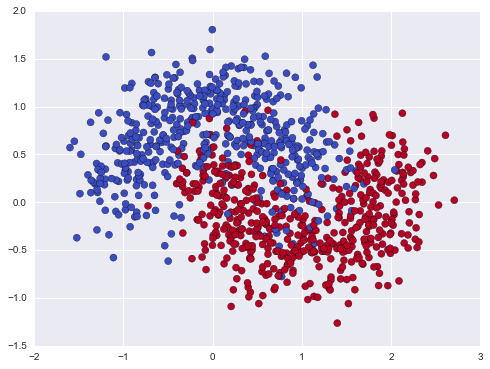

In [4]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

In [18]:
XX[1]

array([-5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92964824,
       -5.92964824, -5.92964824, -5.92964824, -5.92964824, -5.92

In [19]:
plt.contour?

In [20]:
YY

array([[-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ],
       [-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ],
       [-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ],
       ..., 
       [-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ],
       [-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ],
       [-6.        , -5.92964824, -5.85929648, ...,  7.85929648,
         7.92964824,  8.        ]])

In [22]:
Z.shape

(200L, 200L)

In [29]:
clf.decision_function(np.array([0,0]))

c:\Users\docmario\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.04319974])

In [30]:
clf.coef_

array([[ 0.66329036,  0.56359437]])

In [31]:
clf.intercept_

array([ 0.04319974])

In [32]:
# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

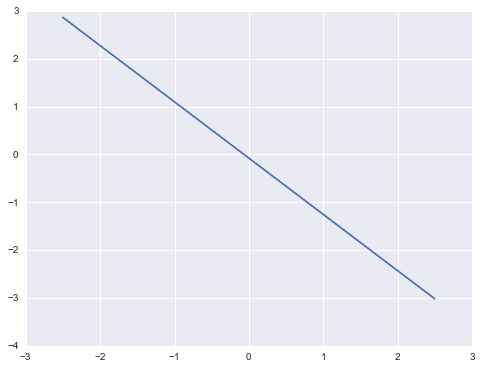

In [34]:
plt.plot(x1, x2)

In [35]:
a

-1.1768931608710183

In [39]:
print "hyperplane = %s * x + %s" % (a, clf.intercept_[0]/w[1])

hyperplane = -1.17689316087 * x + 0.0766504186458


In [44]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

In [46]:
clf?

In [50]:
np.abs(clf.decision_function(clf.support_vectors_)).mean()

1.0001562120652323